<a href="https://colab.research.google.com/github/SCGdk/Food-Production-Colab/blob/main/OwnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sophie

Purpose: to inform about the global food production, especially when it comes to the world's tomatoe production

Date: 3/8/24

Explanation of Dataset: This dataset contains data of total production of different types of foods in per year in each country from 1961-2023 of all country.

Source of Dataset: https://www.kaggle.com/datasets/rafsunahmad/world-food-production

In [ ]:

#@title Import Useful Libraries and Data from GitHub

import pandas as pd # Pandas works with python to help us wrangle data. It can sort, clean, and read our csv files. csv files are how we input data
import numpy as np # Numpy handles the math!
import matplotlib as mpl
import matplotlib.pyplot as plt # Both of these help us make pretty graphs
!pip install geopandas
import geopandas as gpd # Geopandas helps us with geospatial data. We're using data with latitudes and longitudes... So we might need a map.

food = pd.read_csv('https://raw.githubusercontent.com/SCGdk/FoodData/main/world%20food%20production.csv')

#making sure it worked and getting an overview about the different columns
food.head(5)


,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [ ]:
#Taking a first look at the data
food.shape
#it's a LOT of data

(11912, 24)

In [ ]:
food.describe(include="all")
#finding: the lowests quartile produces about half as much corn (maize) as the highest quartile
#--> Interesting because it tells us that not all countries produce the same amount of maiz
#Afghanistan is probably listed as the top country because it start with A. More about that later

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
count,11912,11912.000000,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,...,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04
unique,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1992.115346,1.926434e+07,2.254542e+07,2.744973e+06,2.365684e+07,3.238661e+06,1.350523e+05,5.021303e+06,1.410297e+06,...,2.176532e+06,6.375701e+05,1.502615e+06,3.623623e+06,3.549990e+05,2.191661e+05,1.165719e+06,2.653282e+06,1.564768e+05,3.260419e+06
std,NaN,17.606091,7.028022e+07,7.749779e+07,8.787786e+06,6.177899e+07,1.146992e+07,2.544264e+05,2.001692e+07,3.625725e+06,...,6.078086e+06,1.527103e+06,6.144476e+06,8.225799e+06,8.785398e+05,5.835509e+05,4.050976e+06,8.178866e+06,4.239785e+05,8.748227e+06
min,NaN,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1977.000000,2.379300e+04,3.902475e+04,1.176250e+04,8.892500e+04,1.250000e+04,2.040000e+03,7.082605e+03,1.537675e+04,...,1.182728e+04,5.196345e+03,1.384195e+04,6.757700e+04,3.119250e+03,1.092024e+03,3.882640e+03,1.007145e+04,3.681500e+03,4.431650e+04
50%,NaN,1993.000000,4.000490e+05,4.543745e+05,1.236055e+05,1.650000e+06,1.291410e+05,2.564550e+04,7.828400e+04,1.481504e+05,...,1.469060e+05,4.755700e+04,7.887600e+04,4.680664e+05,3.229550e+04,9.160000e+03,3.659000e+04,1.508370e+05,3.577800e+04,4.222070e+05
75%,NaN,2007.000000,4.979875e+06,4.440542e+06,5.721030e+05,1.524149e+07,8.691358e+05,1.192675e+05,7.472216e+05,1.115602e+06,...,1.434050e+06,4.269712e+05,4.145059e+05,3.080176e+06,2.126140e+05,1.250475e+05,3.547400e+05,1.187962e+06,1.160314e+05,1.950000e+06


In [ ]:
#Finding our first subset of data: tomatoe production per country per year!
#this ensure that our new variable is a list on its own and not a Series
tmtData = food[['Entity', 'Year', 'Tomatoes Production (tonnes)']]
tmtData.head(5)

,Entity,Year,Tomatoes Production (tonnes)
0,Afghanistan,1961,1873812.0
1,Afghanistan,1962,2044797.0
2,Afghanistan,1963,2096077.0
3,Afghanistan,1964,2388264.0
4,Afghanistan,1965,2559608.0


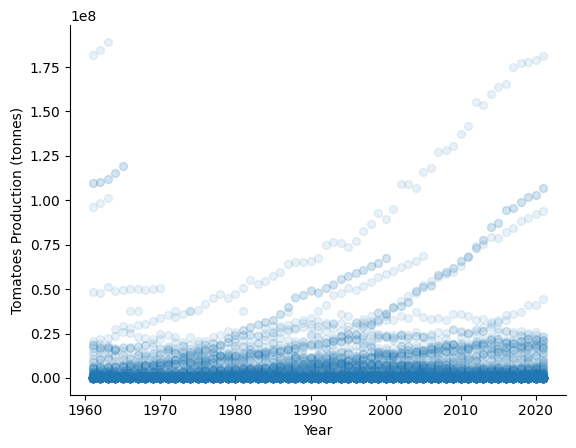

In [ ]:
#This was recommended to me by the colab, don't grade it, I just left it here to figure out how exactly it works later,
#because I've tried to get this done for so long

#the next line gives the code a title!
#@title Year vs Tomatoes Production (tonnes)

tmtData.plot(kind='scatter', x='Year', y='Tomatoes Production (tonnes)', s=32, alpha=.8)

#This line makes the top and right "spine"(side) invisible
plt.gca().spines[['top', 'right',]].set_visible(False)

#Finding: Tomato production increased in most countries, probably due to growth in population
#Let's find the leading country in tomatoe production, first by total and then by Average

In [ ]:
#@title Finding The Country With The Highest Total Tomatoe Production

# 1. Group the data by country and sum up the production of tomatoes for each country
tomPrdCntry = tmtData.groupby('Entity')['Tomatoes Production (tonnes)'].sum()

#2. turn it into another data frame that we'll need later [looked up with chatgpt]
tomPrdCntry_df = tomPrdCntry.reset_index()
tomPrdCntry_df.columns =['Country', 'TotalTmts']

#make sure it worked
print(tomPrdCntry_df)

          Country     TotalTmts
0     Afghanistan  6.136439e+08
1          Africa  6.301866e+08
2    Africa (FAO)  7.147370e+06
3         Albania  3.225081e+07
4         Algeria  1.083053e+09
..            ...           ...
221         World  9.282420e+05
222         Yemen  2.090964e+08
223    Yugoslavia  1.072608e+08
224        Zambia  3.143355e+08
225      Zimbabwe  9.823523e+07

[226 rows x 2 columns]


In [ ]:
#(other than the data frame, this variable has no names for its columns, which is why turning it into a dta frame is so important)
tomPrdCntry.head(5)

Entity
Afghanistan     6.136439e+08
Africa          6.301866e+08
Africa (FAO)    7.147370e+06
Albania         3.225081e+07
Algeria         1.083053e+09
Name: Tomatoes Production (tonnes), dtype: float64

In [ ]:
#3. Finding the country with the highest total production of tomatoes
#idmax gives you the countries name, which is what we want to know [looked up with chatgpt]
country_with_most_tomatoes = tomPrdCntry.idxmax()
max_tomatoes_production = tomPrdCntry.max()
print(f"The country that produces the most tomatoes is {country_with_most_tomatoes} with a total production of {max_tomatoes_production} tonnes.")



The country that produces the most tomatoes is Western Africa (FAO) with a total production of 5018674919.1 tonnes.


In [ ]:
#Then I found the country with least tomatoe production myself
country_with_least_tomatoes = tomPrdCntry.idxmin()
min_tomatoes_production = tomPrdCntry.min()
print(f"The country that produces the least tomatoes is {country_with_least_tomatoes} with a total production of {min_tomatoes_production} tonnes.")


The country that produces the least tomatoes is Finland with a total production of 836.89 tonnes.


In [ ]:
#Let's take a closer look at Finland!
finland=food.query('Entity=="Finland"')
finland.shape

(2, 24)

In [ ]:
#And West Africa!
westAfrica=food.query('Entity=="Western Africa (FAO)"')
westAfrica.shape
#westAfrica.head(5)

(61, 24)

In [ ]:
#And Italy, becuase we'll nee it later
italy=food.query('Entity=="Italy"')
italy.shape
#italy.head(5)

(61, 24)

There's data available for West Africa for a period of 61 years. So the finding that they are the greatest tomatoe producer is might be untrue. They might just have the greatest reported amount of prdouced tomatoes.

Similarly, Finnland might not be the smallest Tomatoe produceer. Rather, it only had two data points available, so it's reported sum of produced tomtoes is the least.

In [ ]:
#Let's find out which country has the highest AVERAGE tomatoe production
#rather than simply the greatest sum
#We've already found the total tomatoe production per country
#and we'll shortly see the amount of years for which data is available.

#counting the number of years and thus data available per country [looked up with chat gpt]
country_counts = food['Entity'].value_counts()

# Convert the Series to a DataFrame with 'Entity' as a column and rename the columns [looked up with chat gpt]
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Data Entries Count']

print(country_counts_df)


         Country  Data Entries Count
0    Afghanistan                  61
1      Nicaragua                  61
2        Morocco                  61
3     Mozambique                  61
4        Myanmar                  61
..           ...                 ...
221        Malta                   4
222      Estonia                   4
223       Sweden                   4
224       Latvia                   4
225      Finland                   2

[226 rows x 2 columns]


(array([  6.,   3.,   4.,   2.,  28.,   5.,   3.,   1.,   3., 171.]),
 array([ 2. ,  7.9, 13.8, 19.7, 25.6, 31.5, 37.4, 43.3, 49.2, 55.1, 61. ]),
 <BarContainer object of 10 artists>)

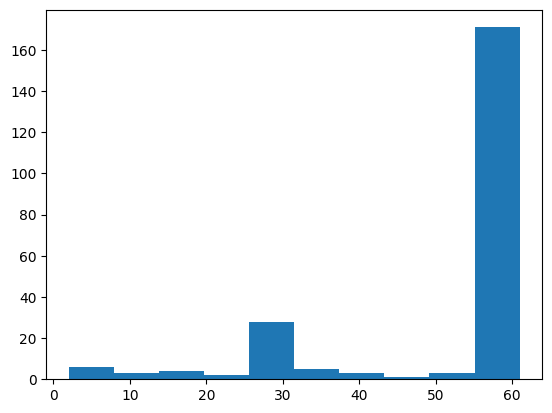

In [ ]:
#now we also have a histogram showing how often data is available for a respective year!!
plt.hist(country_counts)

#Finding: most countries have data available for 61 years. However, some have less.
#This is interesting and important
#because we have to pay special attention to how we compare the date

In [ ]:
#Now we have to divide the total tomatoe production by year
#This would be much easier if I just had a spreadsheet

#I needed help from chat gpt

#This is called a dictionary. It stores data values in key:value pairs
avrgTmt= {
    'Country': country_counts_df['Country'],
    'Data Points Available': country_counts_df['Data Entries Count'],
    'Tomatoe Production per Year': tomPrdCntry_df['TotalTmts'],
 }

# Create a DataFrame from the dictionary
df_avrgTmt = pd.DataFrame(avrgTmt)

# Divide Column1 by Column2 to get the average tomatoes produced per data entry
df_avrgTmt['Average Tomatoes Produced'] = df_avrgTmt['Tomatoe Production per Year'] / df_avrgTmt['Data Points Available']

print(df_avrgTmt)

#it makes a new line for the fourth column, which isn't pretty, but also not a bug worth spending time on
#It's sorted after data points available for now, but that's fine


         Country  Data Points Available  Tomatoe Production per Year  \
0    Afghanistan                     61                 6.136439e+08   
1      Nicaragua                     61                 6.301866e+08   
2        Morocco                     61                 7.147370e+06   
3     Mozambique                     61                 3.225081e+07   
4        Myanmar                     61                 1.083053e+09   
..           ...                    ...                          ...   
221        Malta                      4                 9.282420e+05   
222      Estonia                      4                 2.090964e+08   
223       Sweden                      4                 1.072608e+08   
224       Latvia                      4                 3.143355e+08   
225      Finland                      2                 9.823523e+07   

     Average Tomatoes Produced  
0                 1.005974e+07  
1                 1.033093e+07  
2                 1.171700e+05  
3  

In [ ]:
#@title Finding the highest average tomatoe production

maxAvrgTmtCntr = df_avrgTmt['Average Tomatoes Produced'].idxmax()
maxAvrgTmt = df_avrgTmt['Average Tomatoes Produced'].max()
#print(maxAvrgTmtCntr)
#print(df_avrgTmt.iloc[maxAvrgTmtCntr]['Country'])
print(f"The country that has the highest average production of tomatoes is {(df_avrgTmt.iloc[maxAvrgTmtCntr]['Country'])} with an average production of {maxAvrgTmt} tonnes.")
print(f"There were {(df_avrgTmt.iloc[maxAvrgTmtCntr]['Data Points Available'])} data points available. ")
#When you use an f-string, you can include curly braces {} containing expressions that will be replaced with their values when the string is formatted, makes it prettier

#You could elaborate on this method and only include countries with a minimum number of data points etc...

The country that has the highest average production of tomatoes is South Sudan with an average production of 501867491.91 tonnes.
There were 10 data points available. 


When I looked up the tomato production of Sudan, I found that tomatoes are one of the country's most important crops.

<Axes: xlabel='Year', ylabel='Tomatoes Production (tonnes)'>

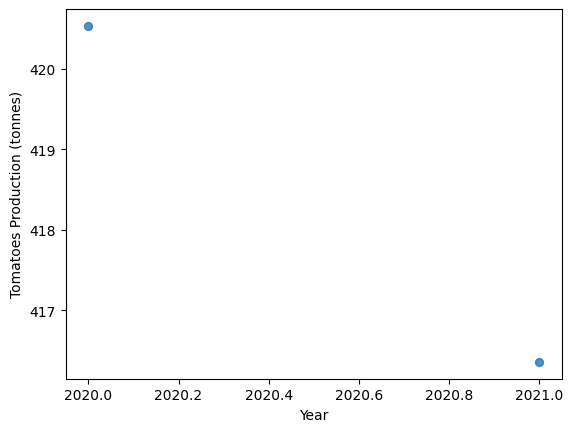

In [ ]:
#@title Scatter Plots

#Let's keep it simple and make a scatter plot with just two data points
finland.plot(kind='scatter', x='Year', y='Tomatoes Production (tonnes)', s=32, alpha=.8)

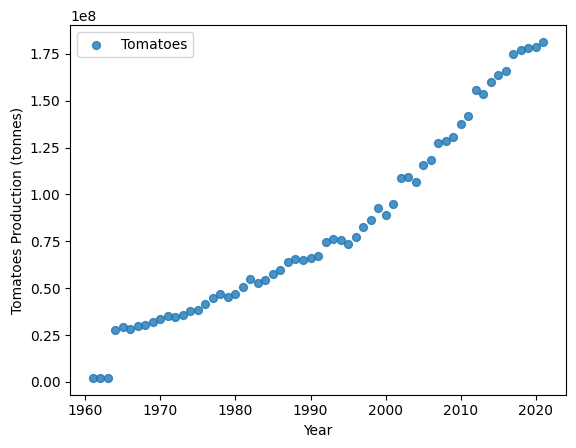

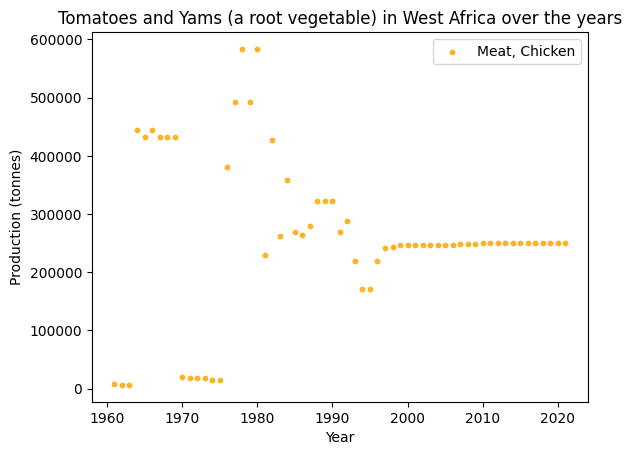

In [ ]:
#More data points!

westAfrica.plot(kind='scatter', x='Year', y='Tomatoes Production (tonnes)', s=32, alpha=0.8, label='Tomatoes')

# Create a scatter plot for meat and chicken production
westAfrica.plot(kind='scatter', x='Year', y='Yams  Production (tonnes)', s=10, alpha=0.8, label='Meat, Chicken', color='orange')

plt.title("Tomatoes and Yams (a root vegetable) in West Africa over the years")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")

plt.legend()  # Show legend with labels for each scatter plot

plt.show()

#Finding: Tomato production increased, whereas the yams production stablized on an even level
#This is interesting, because tomatoes are more a luxury food and yams more basic,
#so apparently the demand for tomatoes has increased

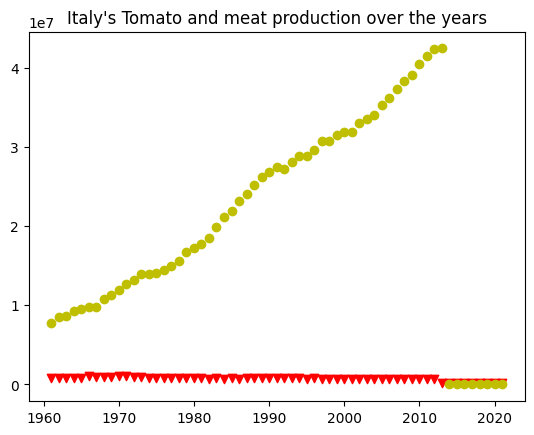

In [ ]:
#@title Looking at Italy
#I think ther's no data available after 2015
#Correlation: Italy's tomatoe production peaked in the 1970s
#and decreased afterward, wheras meat chicken production increased
#If we try to put them in one graph, we run into a scale problem
#--comment one out and the other in
x=italy['Year']
y=italy['Tomatoes Production (tonnes)']

#y2=italy['Meat, chicken  Production (tonnes)']


plt.scatter(x, y, marker='v', color='r');
plt.scatter(x, y2, marker='o', color='y')
plt.title("Italy's Tomato and meat production over the years")
plt.show()

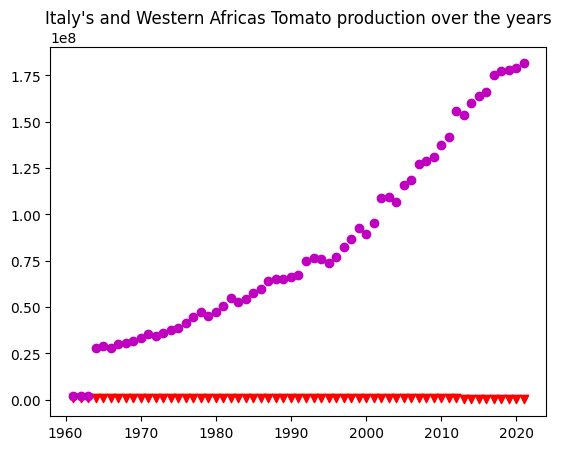

In [ ]:
#When comparing Italie's and africas tomatoe production,
#We run into another scale problem:(

x=italy['Year']
y=italy['Tomatoes Production (tonnes)']

y2=westAfrica['Tomatoes Production (tonnes)']


plt.scatter(x, y, marker='v', color='r');
plt.scatter(x, y2, marker='o', color='m')
plt.title("Italy's and Western Africas Tomato production over the years")
plt.show()

#However, knowing that Itali's tomato production decreased,
#we can sa that the opposite is happening in Western Africa, where it is increasing
#I thinks it's interesting because it shows how different the crops develope in different countries

In [ ]:
#@title More Data, this time about Nicaragua
nicaragua=food.query('Entity=="Nicaragua"')
nicaragua.head(2)

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
7601,Nicaragua,1961,140200.0,1754132.5,22547540.4,101302510.0,8961800.0,1623570.2,1011697.0,451950.4,...,489036.0,105982.2,273389.44,565666.276,6846.8,493131.32,4096.0,47000.0,289130.202,3504141.932
7602,Nicaragua,1962,149900.0,1862215.2,23942163.0,102651660.0,10861700.0,1623570.2,894757.0,291978.2,...,551600.0,136856.4,303430.44,652181.720,5220.0,565536.16,4000.0,40000.0,269209.508,3227977.132


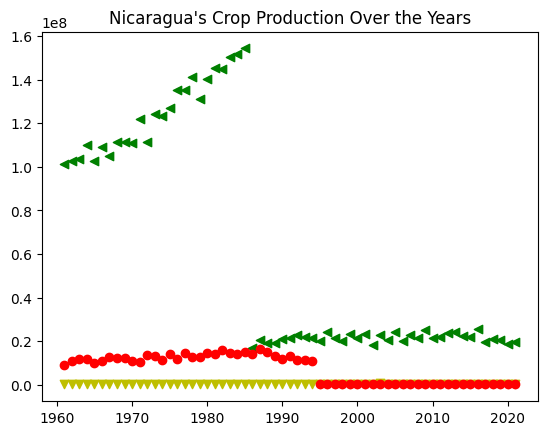

In [ ]:
#We run into another scale problem and some of the data causes trouble, so I commented it out :(

#this attmept to fix it didn't work:
#test4=nicaragua['Yams Production (tonnes)']
#test4.dropna(inplace = True)

x=nicaragua['Year']
y1=nicaragua['Maize Production (tonnes)']
#y2=nicaragua['Rice Production ( tonnes)']
#y3=test4
#y3=nicaragua['Yams Production (tonnes)']
y4=nicaragua['Wheat Production (tonnes)']
y5=nicaragua['Tomatoes Production (tonnes)']
#y6=nicaragua['Tea Production ( tonnes )']
#y7=nicaragua['Sunflower seed Production (tonnes)	']
#y8=nicaragua['Palm oil Production (tonnes)']


plt.scatter(x, y1, marker='v', color='y');
#plt.scatter(x, y2, marker='o', color='w')
#plt.scatter(x, y3, marker='>', color='p')
plt.scatter(x, y4, marker='<', color='g')
plt.scatter(x, y5, marker='o', color='r')
#plt.scatter(x, y6, marker='o', color='b')
#plt.scatter(x, y7, marker='o', color='a')
#plt.scatter(x, y8, marker='o', color='o')
plt.title("Nicaragua's Crop Production Over the Years")
plt.legend
plt.show()

In [ ]:
#@title Pie Charts!

#lets find a subdata set with the world's tomatoe production in 2020 and see how much data it contains
tomatoes2020=tmtData.query('Year==2020')
tomatoes2020.shape

(215, 3)

In [ ]:
tomatoes2020.head(5)
#I wonder why it also contains the Entity and Year. It's exactly what I need, I just wonder how it does it

,Entity,Year,Tomatoes Production (tonnes)
59,Afghanistan,2020,22085254.0
120,Africa,2020,22085254.0
181,Africa (FAO),2020,313109.0
242,Albania,2020,1635616.2
303,Algeria,2020,23931084.0


In [ ]:
tomatoes2020.describe()

,Year,Tomatoes Production (tonnes)
count,215.0,2.150000e+02
mean,2020.0,4.434256e+06
std,0.0,1.747569e+07
min,2020.0,0.000000e+00
25%,2020.0,1.033250e+04
50%,2020.0,1.288160e+05
75%,2020.0,8.754020e+05
max,2020.0,1.788625e+08


In [ ]:
#staring small do see how graphing it as a pie chart might work
test3=tomatoes2020.head(10)
test3

,Entity,Year,Tomatoes Production (tonnes)
59,Afghanistan,2020,2.208525e+07
120,Africa,2020,2.208525e+07
181,Africa (FAO),2020,3.131090e+05
242,Albania,2020,1.635616e+06
303,Algeria,2020,2.393108e+07
364,Americas (FAO),2020,1.670717e+04
425,Angola,2020,3.470000e+01
481,Antigua and Barbuda,2020,9.734502e+05
542,Argentina,2020,1.891896e+07
572,Armenia,2020,1.027212e+08


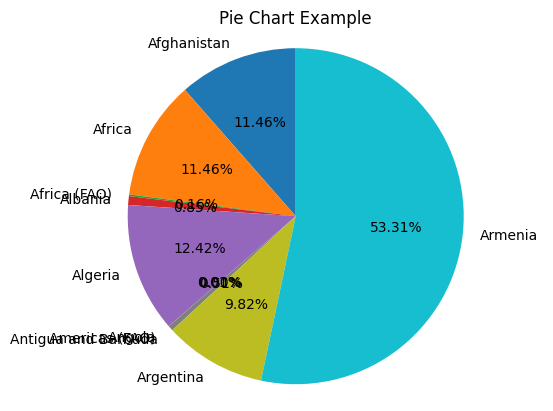

In [ ]:
labels = test3['Entity']
sections = test3['Tomatoes Production (tonnes)']

num_sections = len(sections)
colors = plt.cm.tab10(np.arange(num_sections))

plt.pie(sections, labels=labels,
        startangle=90,
        explode = (None),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Pie Chart Example')
plt.show()

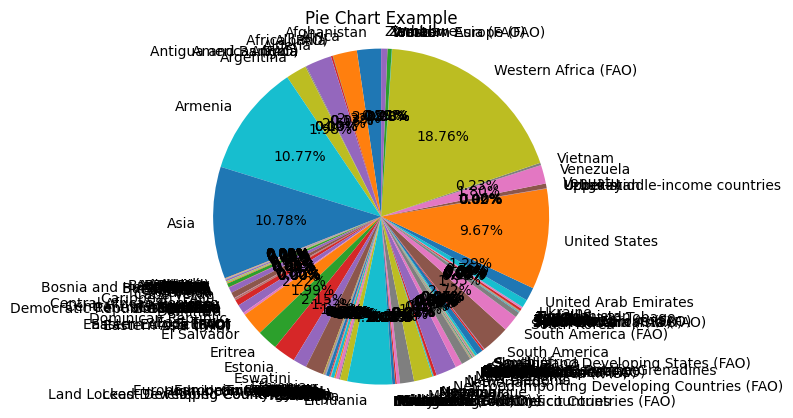

In [ ]:
#Including all 215 data points
#giving it the labels
labels = tomatoes2020['Entity']
#giving it the sections
sections = tomatoes2020['Tomatoes Production (tonnes)']

#I asked chat gpt for help here because I didn't know how to plot so many data points
num_sections = len(sections)
#this gives us 10 different colors that are then being repeated
colors = plt.cm.tab10(np.arange(num_sections))

#plotting the pie chart, like we leared earlier. No need to define colors, for some reason.
#Exlopde=(None) means that not a single piece of the pie sticks out/is highlighted. Everything else would be painful.
#autopct is for formatting the chart as percentages with a maximum of two decimals
plt.pie(sections, labels=labels,
        startangle=90,
        explode = (None),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Pie Chart Example')
plt.show()

#It still looks prety messy, so we'll make it look nicer in the next one

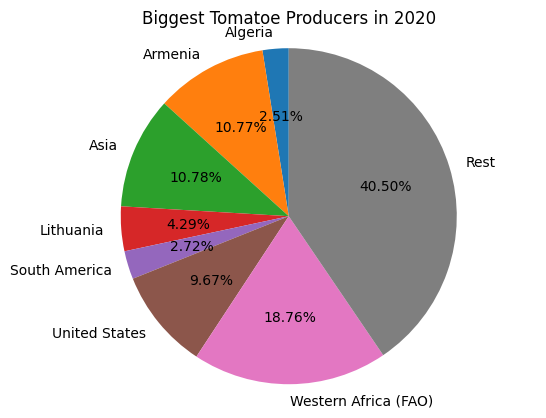

In [ ]:
#Let's finetune it
#I'll copy some coments from above

#Including all 215 data points
#defining the labels (the counries names)
labels = tomatoes2020['Entity']
#defining the sections (the countries tomatoe production in 2020)
#(this only works because there are exaclty as data points for countries as there are for tomatoe production)
sections = tomatoes2020['Tomatoes Production (tonnes)']

#calculate total global production of tomatoes in 2020
#Calculates the total production of tomatoes globally in 2020. This total will be used to determine the proportion of each country's production relative to the total.
total_percent=sum(sections)

#initiallize rest section to summarize small producers in a rest section
sortedsection = []
sortedlabels = []
sizes_summary = 0

#find countries with less than 2.5 percent and add their amount of produced tomatoes to the sumarizng variable.
#Otherwise, put the country and its produced amount as single data points in the sorted lists.
#This part was generated by chat gpt
for label, size in zip(labels, sections):
    if size / total_percent < 0.025:
        sizes_summary += size
    else:
        sortedsection.append(size)
        sortedlabels.append(label)

# Add the combined share the small producer have to the sorted list and label it "rest" in the label list
if sizes_summary > 0:
    sortedsection.append(sizes_summary)
    sortedlabels.append('Rest')

# Generate colors dynamically based on the number of sections (including rest)
#I also asked chat gpt for help on this
num_sections = len(sections)
colors = plt.cm.tab10(np.arange(num_sections))

#plotting the actual pie chart
plt.pie(sortedsection, labels=sortedlabels, colors=colors,
        startangle=90,
        autopct='%1.2f%%')

plt.axis('equal')  # Ensure the pie chart is circular
plt.title('Biggest Tomatoe Producers in 2020')
plt.show()


Key findings:

1.

Things I'd do different the next time

1. Spell tomato correclty

2. Make up my mind about what I want to find out before I begin to work

3. More consistent/systematic naming of variables

Other things I could have investigated:

1. sum of global food production over the years and what share countries or certain foods had of it.

2. Compare different trends in food production

3. Investigate the influence of data availability on accuracy

Here's the transcript of my conversation with chatgpt:
https://chat.openai.com/share/35dd2795-d748-4c2a-8bc1-2374623395d0
